# 缺失值处理

In [1]:
from sklearn.preprocessing import Imputer

In [2]:
df = DataFrame(np.random.randn(6,4),columns=['col1','col2','col3','col4'])
df.iloc[1:2,1] = np.nan
df.iloc[4,3] = np.nan
df

,col1,col2,col3,col4
0,0.723547,0.257461,1.760956,0.076956
1,0.369254,NaN,-1.619055,-0.933010
2,0.142853,-1.618385,0.560992,0.249985
3,0.371641,2.141017,1.224416,2.438345
4,-0.630552,0.279546,-1.501344,NaN
5,0.931650,1.524438,1.145900,-0.825035


In [3]:
df.isnull()

,col1,col2,col3,col4
0,False,False,False,False
1,False,True,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,True
5,False,False,False,False


In [4]:
nan_model = Imputer(missing_values='NaN',strategy='mean',axis=0)
nan_result = nan_model.fit_transform(df)
nan_result

f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[ 0.72354655,  0.25746067,  1.76095619,  0.07695609],
       [ 0.36925364,  0.51681563, -1.61905457, -0.93300952],
       [ 0.14285251, -1.61838459,  0.56099175,  0.24998537],
       [ 0.3716412 ,  2.14101742,  1.22441643,  2.43834507],
       [-0.63055196,  0.27954639, -1.50134356,  0.20144844],
       [ 0.93164955,  1.52443824,  1.1459003 , -0.82503483]])

In [5]:
nan_result_pd1 = df.fillna(method='backfill')
nan_result_pd2 = df.fillna(method='bfill',limit=1)
nan_result_pd3 = df.fillna(method='pad')
nan_result_pd4 = df.fillna(0)
nan_result_pd5 = df.fillna({'col2':1.1,'col4':1.4})
nan_result_pd6 = df.fillna(df.mean()['col2':'col4'])
nan_result_pd1
nan_result_pd2
nan_result_pd3
nan_result_pd4
nan_result_pd5
nan_result_pd6

,col1,col2,col3,col4
0,0.723547,0.257461,1.760956,0.076956
1,0.369254,-1.618385,-1.619055,-0.933010
2,0.142853,-1.618385,0.560992,0.249985
3,0.371641,2.141017,1.224416,2.438345
4,-0.630552,0.279546,-1.501344,-0.825035
5,0.931650,1.524438,1.145900,-0.825035


,col1,col2,col3,col4
0,0.723547,0.257461,1.760956,0.076956
1,0.369254,-1.618385,-1.619055,-0.933010
2,0.142853,-1.618385,0.560992,0.249985
3,0.371641,2.141017,1.224416,2.438345
4,-0.630552,0.279546,-1.501344,-0.825035
5,0.931650,1.524438,1.145900,-0.825035


,col1,col2,col3,col4
0,0.723547,0.257461,1.760956,0.076956
1,0.369254,0.257461,-1.619055,-0.933010
2,0.142853,-1.618385,0.560992,0.249985
3,0.371641,2.141017,1.224416,2.438345
4,-0.630552,0.279546,-1.501344,2.438345
5,0.931650,1.524438,1.145900,-0.825035


,col1,col2,col3,col4
0,0.723547,0.257461,1.760956,0.076956
1,0.369254,0.000000,-1.619055,-0.933010
2,0.142853,-1.618385,0.560992,0.249985
3,0.371641,2.141017,1.224416,2.438345
4,-0.630552,0.279546,-1.501344,0.000000
5,0.931650,1.524438,1.145900,-0.825035


,col1,col2,col3,col4
0,0.723547,0.257461,1.760956,0.076956
1,0.369254,1.100000,-1.619055,-0.933010
2,0.142853,-1.618385,0.560992,0.249985
3,0.371641,2.141017,1.224416,2.438345
4,-0.630552,0.279546,-1.501344,1.400000
5,0.931650,1.524438,1.145900,-0.825035


,col1,col2,col3,col4
0,0.723547,0.257461,1.760956,0.076956
1,0.369254,0.516816,-1.619055,-0.933010
2,0.142853,-1.618385,0.560992,0.249985
3,0.371641,2.141017,1.224416,2.438345
4,-0.630552,0.279546,-1.501344,0.201448
5,0.931650,1.524438,1.145900,-0.825035


# 异常值处理

In [6]:
df = DataFrame({'col1':[1,120,3,5,2,12,13],
               'col2':[12,17,31,53,22,32,43]})
df

,col1,col2
0,1,12
1,120,17
2,3,31
3,5,53
4,2,22
5,12,32
6,13,43


In [7]:
((df - df.mean())/df.std()).abs()
((df - df.mean())/df.std()).abs() > 2.2

,col1,col2
0,0.491018,1.242118
1,2.254069,0.897085
2,0.444882,0.069007
3,0.398746,1.587151
4,0.467950,0.552052
5,0.237270,0.138013
6,0.214202,0.897085


,col1,col2
0,False,False
1,True,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False


# 重复值处理


In [8]:
data1 = ['a', 3]
data2 = ['b', 2]
data3 = ['a', 3]
data4 = ['c', 2]
df = pd.DataFrame([data1, data2, data3, data4], columns=['col1', 'col2'])
df

,col1,col2
0,a,3
1,b,2
2,a,3
3,c,2


In [9]:
df.duplicated(keep='first')

0    False
1    False
2     True
3    False
dtype: bool

In [10]:
df.drop_duplicates()  # 删除数据记录中所有列值相同的记录
df.drop_duplicates(['col1'])  # 删除数据记录中col1值相同的记录
df.drop_duplicates(['col2'])  # 删除数据记录中col2值相同的记录
df.drop_duplicates(['col1', 'col2'])  # 删除数据记录中指定列（col1/col2）值相同的记录

,col1,col2
0,a,3
1,b,2
3,c,2


,col1,col2
0,a,3
1,b,2
3,c,2


,col1,col2
0,a,3
1,b,2


,col1,col2
0,a,3
1,b,2
3,c,2


# 运用标志方法处理分类和顺序数据

In [11]:
from sklearn.preprocessing import OneHotEncoder

In [12]:
df = pd.DataFrame({'id': [3566841, 6541227, 3512441],
                   'sex': ['male', 'Female', 'Female'],
                   'level': ['high', 'low', 'middle']})
print (df)  # 打印输出原始数据框

# 自定义转换主过程
df_new = df.copy()  # 复制一份新的数据框用来存储转换结果
for col_num, col_name in enumerate(df):  # 循环读出每个列的索引值和列名
    col_data = df[col_name]  # 获得每列数据
    col_dtype = col_data.dtype  # 获得每列dtype类型
    if col_dtype == 'object':  # 如果dtype类型是object（非数值型），执行条件
        df_new = df_new.drop(col_name, 1)  # 删除df数据框中要进行标志转换的列
        value_sets = col_data.unique()  # 获取分类和顺序变量的唯一值域
        for value_unique in value_sets:  # 读取分类和顺序变量中的每个值
            col_name_new = col_name + '_' + value_unique  # 创建新的列名，使用原标题+值的方式命名
            col_tmp = df.iloc[:, col_num]  # 获取原始数据列
            new_col = (col_tmp == value_unique)  # 将原始数据列与每个值进行比较，相同为True，否则为False
            df_new[col_name_new] = new_col  # 为最终结果集增加新列值
print (df_new)  # 打印输出转换后的数据框

        id     sex   level
0  3566841    male    high
1  6541227  Female     low
2  3512441  Female  middle
        id  sex_male  sex_Female  level_high  level_low  level_middle
0  3566841      True       False        True      False         False
1  6541227     False        True       False       True         False
2  3512441     False        True       False      False          True


In [13]:
# 使用sklearn进行标志转换
df2 = pd.DataFrame({'id': [3566841, 6541227, 3512441],
                    'sex': [1, 2, 2],
                    'level': [3, 1, 2]})
id_data = df2.values[:, :1]  # 获得ID列
transform_data = df2.values[:, 1:]  # 指定要转换的列
enc = OneHotEncoder()  # 建立模型对象
df2_new = enc.fit_transform(transform_data).toarray()  # 标志转换
df2_all = pd.concat((pd.DataFrame(id_data), pd.DataFrame(df2_new)), axis=1)  # 组合为数据框
print (df2_all)  # 打印输出转换后的数据框

         0    0    1    2    3    4
0  3566841  1.0  0.0  0.0  0.0  1.0
1  6541227  0.0  1.0  1.0  0.0  0.0
2  3512441  0.0  1.0  0.0  1.0  0.0


f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


# 降维

## 基于特征选择的降维

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

In [15]:
data = np.loadtxt('./datacode_for_book/chapter3/data1.txt')
x = data[:,:-1]
y = data[:,-1]

In [16]:
model_tree = DecisionTreeClassifier(random_state=0)
model_tree.fit(x,y)
model_tree.feature_importances_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

array([0.03331054, 0.01513967, 0.02199713, 0.119727  , 0.47930312,
       0.04776297, 0.17111746, 0.02585441, 0.02012725, 0.06566044])

## 基于维度转化的降维

In [17]:
model_pca = PCA()
model_pca.fit(x)
model_pca.transform(x)
model_pca.components_ #获得转换后的所有主成分
model_pca.explained_variance_ #转换后各主成分方差
model_pca.explained_variance_ratio_ #转换后各主成分方差占比

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

array([[-7.14927818e-01, -1.28423732e+00,  9.70941426e-02, ...,
         8.49862907e-01, -3.47013506e-16,  2.42503693e-16],
       [ 4.53144795e+00,  8.94878501e-01,  1.43687773e-01, ...,
        -9.68730619e-01,  4.86349694e-16, -1.38323122e-16],
       [-2.26234301e+00,  2.02927993e+00, -1.64956276e+00, ...,
         8.78685187e-01, -5.30627953e-16, -1.91564966e-16],
       ...,
       [ 1.67848551e+00,  1.85832563e+00,  1.92665769e+00, ...,
         8.60429575e-01,  3.27877207e-16,  2.50673756e-16],
       [ 2.26445904e+00, -1.81967438e+00, -2.08053649e+00, ...,
         1.64953682e-01,  5.38344277e-16, -8.12851964e-17],
       [-1.46084060e+00,  9.23766684e-01,  9.60664147e-02, ...,
         3.25635502e-01, -2.03827287e-16,  6.98939901e-17]])

array([[ 7.18818316e-03,  1.41619205e-02,  1.00543847e-02,
         3.65097575e-01,  6.38944537e-01, -1.95750380e-02,
        -1.73413378e-01, -3.80829974e-02, -2.87413113e-03,
        -6.52829504e-01],
       [ 1.01307710e-02, -1.95270201e-04, -2.33689543e-02,
        -6.12915216e-01,  5.08983971e-01, -2.23429533e-02,
         6.02958940e-01, -1.49061329e-02, -1.81362216e-02,
        -3.41623971e-03],
       [ 2.42092694e-01, -3.68867909e-01,  8.69351030e-02,
        -7.00211582e-03, -1.29243443e-02, -1.85568410e-01,
         3.19371656e-03, -5.45736371e-01,  6.81990577e-01,
         1.29862924e-02],
       [-5.37952093e-01, -3.20020806e-01,  5.71456215e-01,
        -6.04075415e-03,  5.35156139e-03, -4.92373002e-01,
         6.00870251e-03,  1.94978861e-01, -3.29057598e-02,
        -2.66614329e-04],
       [-2.91882846e-02, -4.75039025e-01,  9.53825483e-03,
         5.00110135e-03, -1.65709576e-02,  1.71776210e-01,
        -7.36820709e-03, -5.63662239e-01, -6.52490553e-01,
         8.

array([4.22602937e+00, 2.21149972e+00, 1.11509461e+00, 1.09123938e+00,
       1.02864637e+00, 1.00339950e+00, 9.21917768e-01, 8.92677850e-01,
       7.13707238e-32, 2.68187174e-32])

array([3.38339364e-01, 1.77054475e-01, 8.92753857e-02, 8.73655166e-02,
       8.23542686e-02, 8.03329836e-02, 7.38094896e-02, 7.14685179e-02,
       5.71399845e-33, 2.14712842e-33])

# 解决样本类别不均衡的问题(过抽样、欠抽样)

In [18]:
from imblearn.over_sampling import SMOTE #过抽样处理
from imblearn.under_sampling import RandomUnderSampler # 欠抽样
from sklearn.svm import SVC #支持向量机
from imblearn.ensemble import EasyEnsemble #简单集成办法

In [19]:
df = pd.read_csv('./datacode_for_book/chapter3/data2.txt',sep=' ',names=['col1','col2','col3','col4','col5','label'])
df.head()

,col1,col2,col3,col4,col5,label
0,1.484710,-0.567953,0.957248,-1.028711,-1.143092,0.0
1,-1.021847,-0.209943,0.585039,-0.625991,-0.532367,0.0
2,-0.418176,0.878976,-0.333351,0.371767,1.223683,0.0
3,0.441664,1.405135,2.334376,-2.453234,0.594130,0.0
4,-1.855857,1.342565,1.457096,-1.522041,0.935034,0.0


In [20]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
df.groupby('label').count()

,col1,col2,col3,col4,col5
label,,,,,
0.0,942,942,942,942,942
1.0,58,58,58,58,58


## 过抽样

In [21]:
model_smote = SMOTE()
x_smote_resampled,y_smote_resampled = model_smote.fit_sample(x,y)
x_smote_resampled = pd.DataFrame(x_smote_resampled, columns=['col1', 'col2', 'col3', 'col4', 'col5'])  # 将数据转换为数据框并命名列名
y_smote_resampled = pd.DataFrame(y_smote_resampled, columns=['label'])  # 将数据转换为数据框并命名列名
smote_resampled = pd.concat([x_smote_resampled, y_smote_resampled], axis=1)  # 按列合并数据框
groupby_data_smote = smote_resampled.groupby('label').count()  # 对label做分类汇总
print (groupby_data_smote)  # 打印输出经过SMOTE处理后的数据集样本分类分布

       col1  col2  col3  col4  col5
label                              
0.0     942   942   942   942   942
1.0     942   942   942   942   942


## 欠抽样

In [22]:
# 使用RandomUnderSampler方法进行欠抽样处理
model_RandomUnderSampler = RandomUnderSampler()  # 建立RandomUnderSampler模型对象
x_RandomUnderSampler_resampled, y_RandomUnderSampler_resampled = model_RandomUnderSampler.fit_sample(x,
                                                                                                     y)  # 输入数据并作欠抽样处理
x_RandomUnderSampler_resampled = pd.DataFrame(x_RandomUnderSampler_resampled,
                                              columns=['col1', 'col2', 'col3', 'col4', 'col5'])  # 将数据转换为数据框并命名列名
y_RandomUnderSampler_resampled = pd.DataFrame(y_RandomUnderSampler_resampled, columns=['label'])  # 将数据转换为数据框并命名列名
RandomUnderSampler_resampled = pd.concat([x_RandomUnderSampler_resampled, y_RandomUnderSampler_resampled],
                                         axis=1)  # 按列合并数据框
groupby_data_RandomUnderSampler = RandomUnderSampler_resampled.groupby('label').count()  # 对label做分类汇总
print (groupby_data_RandomUnderSampler)  # 打印输出经过RandomUnderSampler处理后的数据集样本分类分布

       col1  col2  col3  col4  col5
label                              
0.0      58    58    58    58    58
1.0      58    58    58    58    58


## 使用svc权重处理不均衡样本

In [23]:
# 使用SVM的权重调节处理不均衡样本
model_svm = SVC(class_weight='balanced')  # 创建SVC模型对象并指定类别权重
model_svm.fit(x, y)  # 输入x和y并训练模型

model_svm.class_weight_

f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

array([0.53078556, 8.62068966])

## EasyEnsemble处理不均衡样本（不在可用）

In [24]:
# 使用集成方法EasyEnsemble处理不均衡样本
model_EasyEnsemble = EasyEnsemble()  # 建立EasyEnsemble模型对象
x_EasyEnsemble_resampled, y_EasyEnsemble_resampled = model_EasyEnsemble.fit_sample(x, y)  # 输入数据并应用集成方法处理
print (x_EasyEnsemble_resampled.shape)  # 打印输出集成方法处理后的x样本集概况
print (y_EasyEnsemble_resampled.shape)  # 打印输出集成方法处理后的y标签集概况

(10, 116, 5)
(10, 116)


f:\ProgramData\Anaconda3\envs\normal\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class EasyEnsemble is deprecated; EasyEnsemble is deprecated in 0.4 and will be removed in 0.6. Use EasyEnsembleClassifier instead.
  warnings.warn(msg, category=DeprecationWarning)


In [25]:
# 抽取其中一份数据做审查
index_num = 1  # 设置抽样样本集索引
x_EasyEnsemble_resampled_t = pd.DataFrame(x_EasyEnsemble_resampled[index_num],
                                          columns=['col1', 'col2', 'col3', 'col4', 'col5'])  # 将数据转换为数据框并命名列名
y_EasyEnsemble_resampled_t = pd.DataFrame(y_EasyEnsemble_resampled[index_num], columns=['label'])  # 将数据转换为数据框并命名列名
EasyEnsemble_resampled = pd.concat([x_EasyEnsemble_resampled_t, y_EasyEnsemble_resampled_t], axis=1)  # 按列合并数据框
groupby_data_EasyEnsemble = EasyEnsemble_resampled.groupby('label').count()  # 对label做分类汇总
print (groupby_data_EasyEnsemble)  # 打印输出经过EasyEnsemble处理后的数据集样本分类分布

       col1  col2  col3  col4  col5
label                              
0.0      58    58    58    58    58
1.0      58    58    58    58    58


# 抽样

In [26]:
import random

In [27]:
# 简单随机抽样
data = np.loadtxt('./datacode_for_book/chapter3/data3.txt')  # 导入普通数据文件
data[:5]
data_sample = random.sample(list(data), 2000)  # 随机抽取2000个样本
print (data_sample[:2])  # 打印输出前2条数据
print (len(data_sample))  # 打印输出抽样样本量


array([[-3.08057779,  8.09020329,  2.02732982,  2.92353937, -6.06318211],
       [-4.03307362,  8.58624006,  3.897472  ,  1.26982588, -9.01924785],
       [-3.13867258,  9.6120066 ,  7.19936687,  2.36740271, -6.75740803],
       [-3.02463329,  8.41403228,  5.58731866,  2.26420369, -7.51518693],
       [-3.53074982,  8.85253074,  4.10623003,  1.96764182, -7.10907764]])

[array([-3.64045862,  8.06941636,  4.76383677,  3.73123904, -6.31894653]), array([ -9.44433652, -10.69339784,  10.49071306,   1.3577941 ,
         5.6303159 ])]
2000


In [28]:

# 等距抽样
data = np.loadtxt('./datacode_for_book/chapter3/data3.txt')  # 导入普通数据文件
sample_count = 2000  # 指定抽样数量
record_count = data.shape[0]  # 获取最大样本量
width = record_count / sample_count  # 计算抽样间距
data_sample = []  # 初始化空白列表，用来存放抽样结果数据
i = 0  # 自增计数以得到对应索引值
while len(data_sample) <= sample_count and i * width <= record_count - 1:  # 当样本量小于等于指定抽样数量并且矩阵索引在有效范围内时
    data_sample.append(data[int(i * width)])  # 新增样本
    i += 1  # 自增长
print (data_sample[:2])  # 打印输出前2条数据
print (len(data_sample))  # 打印输出样本数量

[array([-3.08057779,  8.09020329,  2.02732982,  2.92353937, -6.06318211]), array([-2.11984871,  7.74916701,  5.7318711 ,  4.75148273, -5.68598747])]
2000


In [29]:
# 分层抽样
# 导入有标签的数据文件
data2 = np.loadtxt('./datacode_for_book/chapter3/data2.txt')  # 导入带有分层逻辑的数据
each_sample_count = 200  # 定义每个分层的抽样数量
label_data_unique = np.unique(data2[:, -1])  # 定义分层值域
sample_list = []  # 定义空列表，用于存放临时分层数据
sample_data = []  # 定义空列表，用于存放最终抽样数据
sample_dict = {}  # 定义空字典，用来显示各分层样本数量
for label_data in label_data_unique:  # 遍历每个分层标签
    for data_tmp in data2:  # 读取每条数据
        if data_tmp[-1] == label_data:  # 如果数据最后一列等于标签
            sample_list.append(data_tmp)  # 将数据加入到分层数据中
    each_sample_data = random.sample(sample_list, each_sample_count)  # 对每层数据都随机抽样
    sample_data.extend(each_sample_data)  # 将抽样数据追加到总体样本集
    sample_dict[label_data] = len(each_sample_data)  # 样本集统计结果
print (sample_dict)  # 打印输出样本集统计结果

{0.0: 200, 1.0: 200}


In [30]:
# 整群抽样
data3 = np.loadtxt('./datacode_for_book/chapter3/data4.txt')  # 导入已经划分好整群的数据集
label_data_unique = np.unique(data3[:, -1])  # 定义整群标签值域
print (label_data_unique)  # 打印输出所有整群标签
sample_label = random.sample(list(label_data_unique), 2)  # 随机抽取2个整群
sample_data = []  # 定义空列表，用来存储最终抽样数据
for each_label in sample_label:  # 遍历每个整群标签值域
    for data_tmp in data3:  # 遍历每个样本
        if data_tmp[-1] == each_label:  # 判断样本是否属于抽样整群
            sample_data.append(data_tmp)  # 样本添加到最终抽样数据集
print (sample_label)  # 打印输出样本整群标签
print (len(sample_data))  # 打印输出总抽样数据记录条数

[0. 1. 2. 3.]
[2.0, 0.0]
498


# 共线问题

In [31]:
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

In [32]:
data = np.loadtxt('./datacode_for_book/chapter3/data5.txt', delimiter='\t')  # 读取数据文件
x = data[:, :-1]  # 切分自变量
y = data[:, -1]  # 切分预测变量
x[:3]
y[:3]

array([[9.74500000e+01, 6.91560000e+02, 3.17747000e+03, 4.63561000e+03,
        2.54893500e+04, 7.26410300e+04, 2.50230850e+05, 1.48545545e+06,
        1.48517277e+06],
       [1.01760000e+02, 9.20360000e+02, 1.57680100e+04, 3.70848000e+03,
        2.80681440e+05, 3.02209800e+04, 6.39772285e+06, 5.72076300e+05,
        5.71978860e+05],
       [9.82100000e+01, 8.94760000e+02, 8.82403000e+03, 6.18206000e+03,
        7.84895700e+04, 5.31573200e+04, 1.61567885e+06, 1.05798051e+06,
        1.05838664e+06]])

array([ 812.46, 1185.68,  894.41])

In [33]:
#使用岭回归
model_ridge = Ridge(alpha=1)
model_ridge.fit(x,y)
model_ridge.coef_
model_ridge.intercept_

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

array([ 8.50164360e+01, -1.18330186e-03,  9.80792921e-04, -8.54201056e-04,
        2.10489064e-05,  2.20180449e-04, -3.00990875e-06, -9.30084240e-06,
       -2.84498824e-08])

-7443.986528680895

In [34]:
#使用主成分回归进行回归分析
model_pca = PCA()
data_pca = model_pca.fit_transform(x)
model_pca.explained_variance_ratio_
ratio_cumsum = np.cumsum(model_pca.explained_variance_ratio_)
rule_index = np.where(ratio_cumsum > 0.8)
rule_index
min_index = rule_index[0][0]
data_pca_result = data_pca[:,:min_index+1]
model_liner = LinearRegression()
model_liner.fit(data_pca_result,y)
model_liner.coef_
model_liner.intercept_

array([9.02799999e-01, 8.29049404e-02, 1.38691828e-02, 3.84960371e-04,
       3.65326238e-05, 3.77177567e-06, 6.00044773e-07, 1.26607730e-08,
       4.94381256e-13])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64),)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

array([1.26262171e-05])

1058.52726

# 相关分析

array([[ 1.00000000e+00, -3.93808149e-02,  2.70272318e-01,
        -4.68122068e-02,  2.12352100e-01, -4.96538227e-02,
         1.94945705e-01, -2.93883722e-02, -2.38246921e-02],
       [-3.93808149e-02,  1.00000000e+00, -1.02670977e-02,
         7.28366108e-01, -5.07932992e-03,  6.23579830e-01,
         2.03730883e-03,  4.80135223e-01,  5.09560242e-01],
       [ 2.70272318e-01, -1.02670977e-02,  1.00000000e+00,
        -1.00510096e-02,  7.17707624e-01, -5.71584308e-04,
         6.53531250e-01,  1.05616598e-02,  2.46062412e-02],
       [-4.68122068e-02,  7.28366108e-01, -1.00510096e-02,
         1.00000000e+00,  8.14189905e-03,  8.75769561e-01,
         1.16557603e-02,  7.02587197e-01,  7.18844901e-01],
       [ 2.12352100e-01, -5.07932992e-03,  7.17707624e-01,
         8.14189905e-03,  1.00000000e+00,  1.89758904e-02,
         9.14978146e-01,  2.73933100e-02,  2.93706317e-02],
       [-4.96538227e-02,  6.23579830e-01, -5.71584308e-04,
         8.75769561e-01,  1.89758904e-02,  1.000000

<Figure size 1152x576 with 0 Axes>

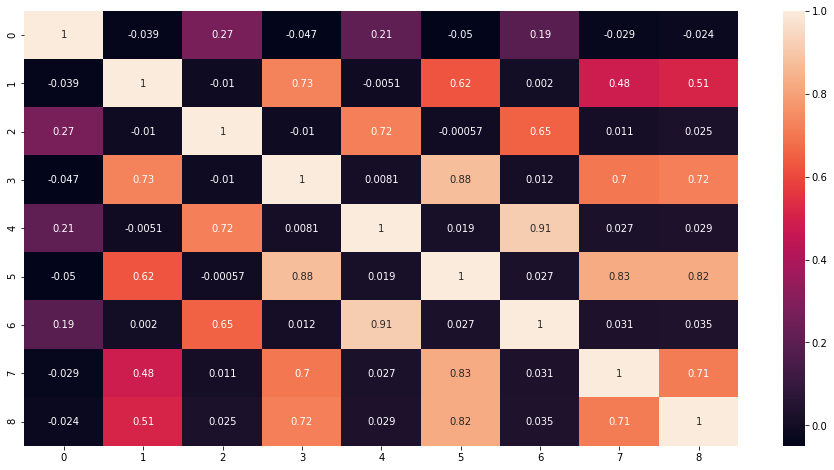

In [43]:
data = np.loadtxt('./datacode_for_book/chapter3/data5.txt', delimiter='\t')  # 读取数据文件
x = data[:, :-1]  # 切分自变量
correlation_matrix = np.corrcoef(x, rowvar=0)  # 相关性分析
correlation_matrix
import seaborn as sns
plt.figure(figsize=(16,8))
sns.heatmap(correlation_matrix,annot=True)

# 标准化

In [44]:
from sklearn import preprocessing

In [46]:
data = np.loadtxt('./datacode_for_book/chapter3/data6.txt', delimiter='\t')  # 读取数据

<Figure size 1152x576 with 0 Axes>

Text(0.5,1,'source data')

Text(0.5,1,'zscore_scaler')

Text(0.5,1,'minmax_scaler')

Text(0.5,1,'maxabsscaler_scaler')

Text(0.5,1,'robustscalerr_scaler')

Text(0.5,0.98,'raw data and standardized data')

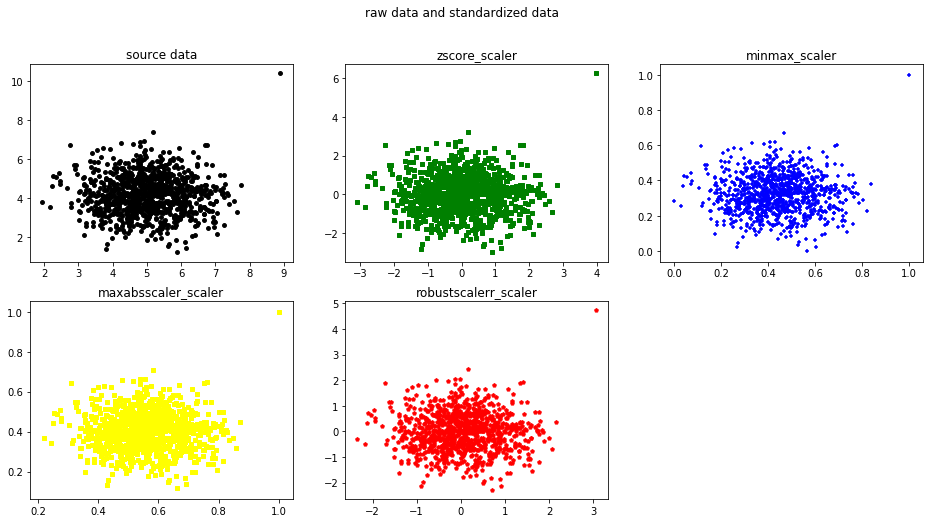

In [53]:

# Z-Score标准化
zscore_scaler = preprocessing.StandardScaler()  # 建立StandardScaler对象
data_scale_1 = zscore_scaler.fit_transform(data)  # StandardScaler标准化处理

# Max-Min标准化
minmax_scaler = preprocessing.MinMaxScaler()  # 建立MinMaxScaler模型对象
data_scale_2 = minmax_scaler.fit_transform(data)  # MinMaxScaler标准化处理

# MaxAbsScaler标准化
maxabsscaler_scaler = preprocessing.MaxAbsScaler()  # 建立MaxAbsScaler对象
data_scale_3 = maxabsscaler_scaler.fit_transform(data)  # MaxAbsScaler标准化处理

# RobustScaler标准化
robustscalerr_scaler = preprocessing.RobustScaler()  # 建立RobustScaler标准化对象
data_scale_4 = robustscalerr_scaler.fit_transform(data)  # RobustScaler标准化标准化处理

# 展示多网格结果
data_list = [data, data_scale_1, data_scale_2, data_scale_3, data_scale_4]  # 创建数据集列表
scalar_list = [15, 10, 15, 10, 15, 10]  # 创建点尺寸列表
color_list = ['black', 'green', 'blue', 'yellow', 'red']  # 创建颜色列表
merker_list = ['o', ',', '+', 's', 'p']  # 创建样式列表
title_list = ['source data', 'zscore_scaler', 'minmax_scaler', 'maxabsscaler_scaler', 'robustscalerr_scaler']  # 创建标题列表
plt.figure(figsize=(16,8))
for i, data_single in enumerate(data_list):  # 循环得到索引和每个数值
    
    plt.subplot(2, 3, i + 1)  # 确定子网格
    plt.scatter(data_single[:, :-1], data_single[:, -1], s=scalar_list[i], marker=merker_list[i],
                c=color_list[i])  # 子网格展示散点图
    plt.title(title_list[i])  # 设置子网格标题
plt.suptitle("raw data and standardized data")  # 设置总标题
plt.show()  # 展示图形